In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon


In [2]:
path = "../Data/coral_watch_ala/data_honduras.xlsx"
df = pd.read_excel(path, sheet_name="CoralWatch Random Survey")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [37]:
gdf['Observation date'] = pd.to_datetime(gdf['Observation date'])
gdf['Site Name'].unique()
gdf_2017 = gdf[gdf['Observation date'] >'2014-12-31']

In [38]:
print(gdf_2017.crs)

None


In [39]:
top_left_y, top_left_x = 16.12397, -87.03495
btm_right_y, btm_right_x = 16.04431, -86.85727
bbox = box(top_left_x, top_left_y, btm_right_x, btm_right_y)

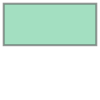

In [40]:
bbox

In [41]:
subset_gdf_2015 = gdf_2017.cx[bbox.bounds[0]: bbox.bounds[2], bbox.bounds[1]: bbox.bounds[3]]
subset_gdf_2015 = subset_gdf_2015.set_crs('EPSG:4326')

In [42]:
import os 

In [43]:
path = "/media/ziad/Expansion/Honduras_Extracted/"

In [44]:
for fname in os.scandir(path):

    tiff_path = fname
    break
with rasterio.open(tiff_path) as src:
    # transform the given longitude and latitude to the coordinate system of the raster
    dst_crs = src.crs


In [45]:
subset_gdf_2015.to_crs(src.crs)

,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,Verification status,Latitude,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
0,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,095011a8-1e48-45b1-9ddd-95f95fe0bb57,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,16.084444,...,1,D2,D3,2.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||20,Cust...",POINT (511883.369 1778279.330)
1,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,095011a8-1e48-45b1-9ddd-95f95fe0bb57,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,16.084444,...,2,D3,D5,4.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||20,Cust...",POINT (511883.369 1778279.330)
2,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,095011a8-1e48-45b1-9ddd-95f95fe0bb57,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,16.084444,...,3,C3,C6,4.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||20,Cust...",POINT (511883.369 1778279.330)
3,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,095011a8-1e48-45b1-9ddd-95f95fe0bb57,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,16.084444,...,4,C3,C4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||20,Cust...",POINT (511883.369 1778279.330)
4,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,095011a8-1e48-45b1-9ddd-95f95fe0bb57,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,16.084444,...,5,B4,B5,4.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||20,Cust...",POINT (511883.369 1778279.330)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101647,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,f944e90d-9b90-4ab8-938f-1252463f1dac,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,not applicable,16.083332,...,16,E3,E4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...",CustomChartDataItem|||Boulder corals|||20,POINT (510427.776 1778155.591)
101648,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,f944e90d-9b90-4ab8-938f-1252463f1dac,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,not applicable,16.083332,...,17,E3,E4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...",CustomChartDataItem|||Boulder corals|||20,POINT (510427.776 1778155.591)
101649,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,f944e90d-9b90-4ab8-938f-1252463f1dac,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,not applicable,16.083332,...,18,B2,B4,3.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...",CustomChartDataItem|||Boulder corals|||20,POINT (510427.776 1778155.591)
101650,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,f944e90d-9b90-4ab8-938f-1252463f1dac,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,acti

In [46]:
average_data_frame = subset_gdf_2015.groupby(['Observation date', 'Site Name']).mean()['Average.']

/tmp/ipykernel_122928/3470215383.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data_frame = subset_gdf_2015.groupby(['Observation date', 'Site Name']).mean()['Average.']


In [47]:
grouped_data = average_data_frame.reset_index()
grouped_data['Observation date'] = pd.to_datetime(grouped_data['Observation date'])
grouped_data = grouped_data.set_index(['Observation date', 'Site Name'])

In [48]:
import matplotlib.pyplot as plt

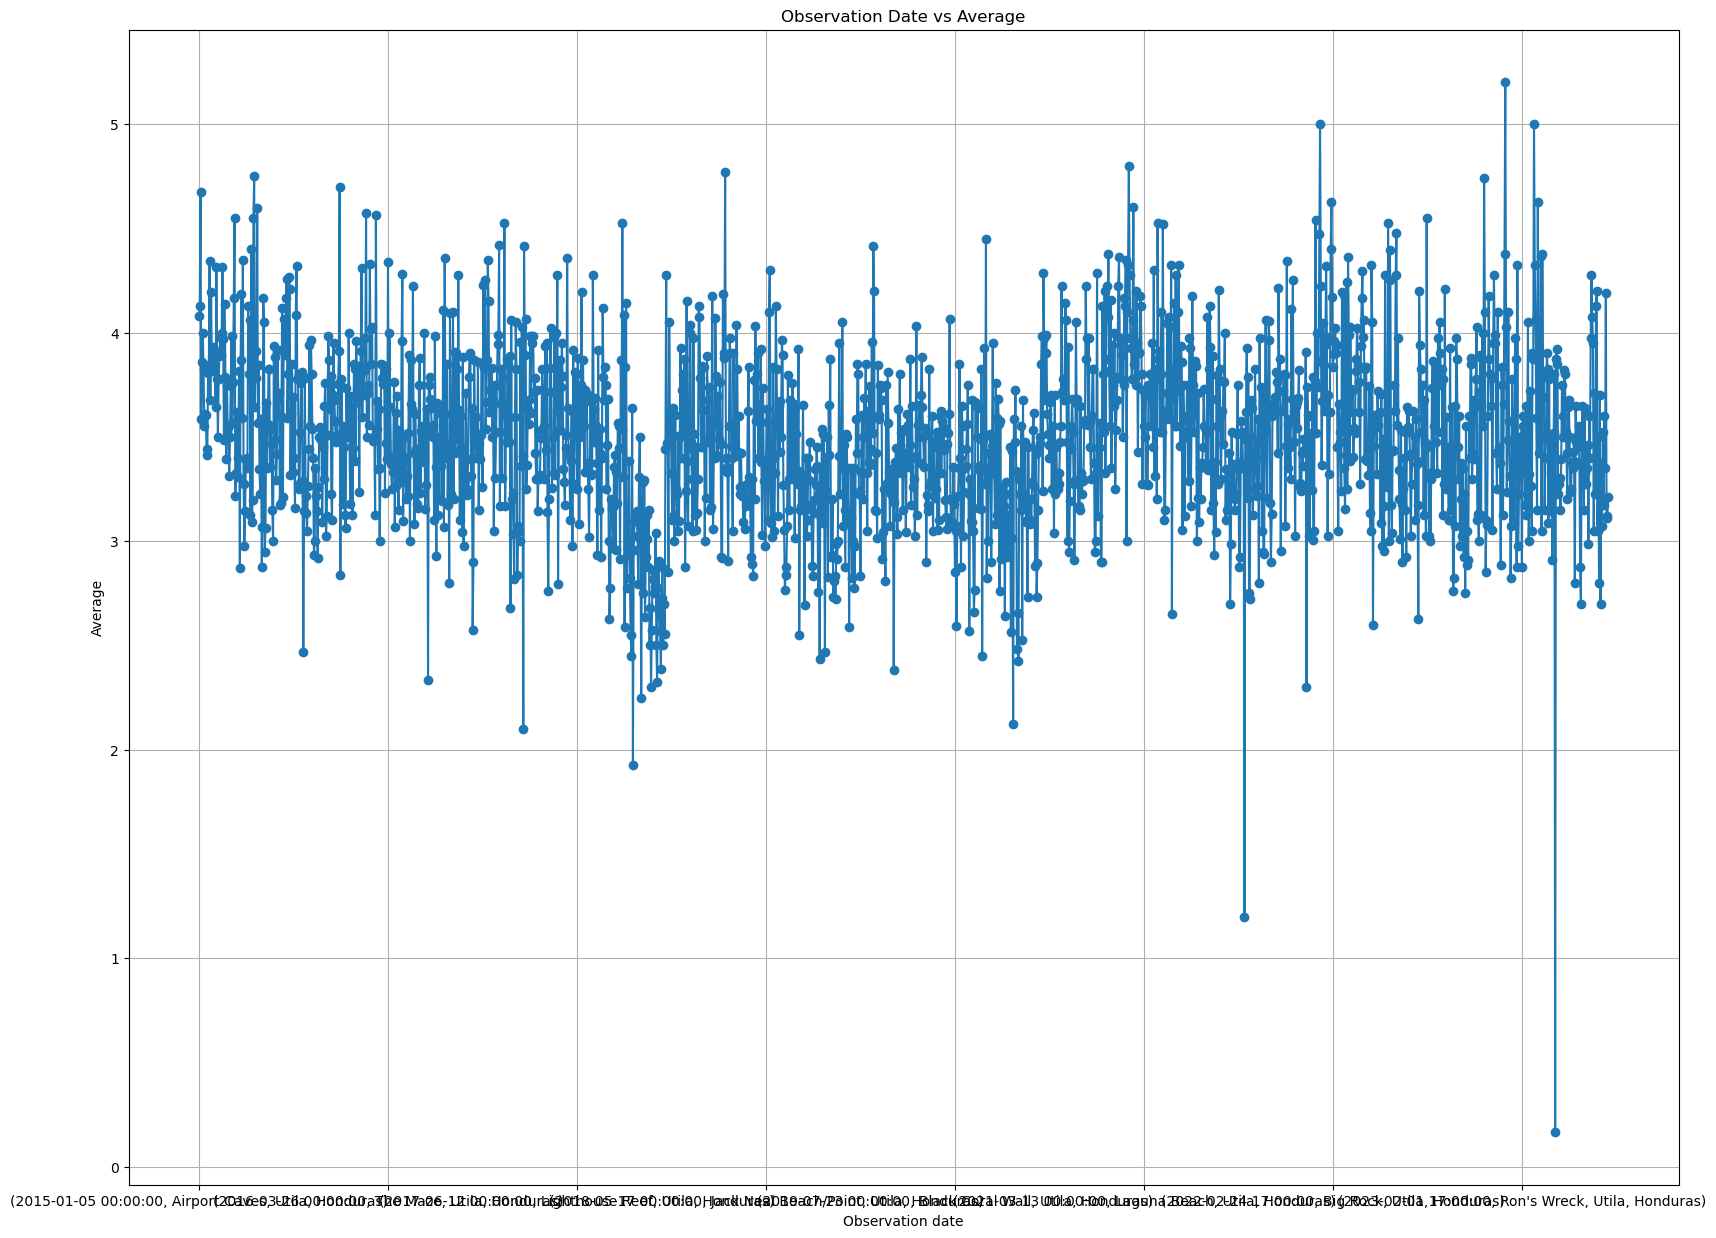

In [49]:
grouped_data['Average.'].plot(marker='o', linestyle='-', figsize=(20, 15))
plt.xlabel('Observation date')
plt.ylabel('Average')
plt.title('Observation Date vs Average')
plt.grid(True)
plt.show()

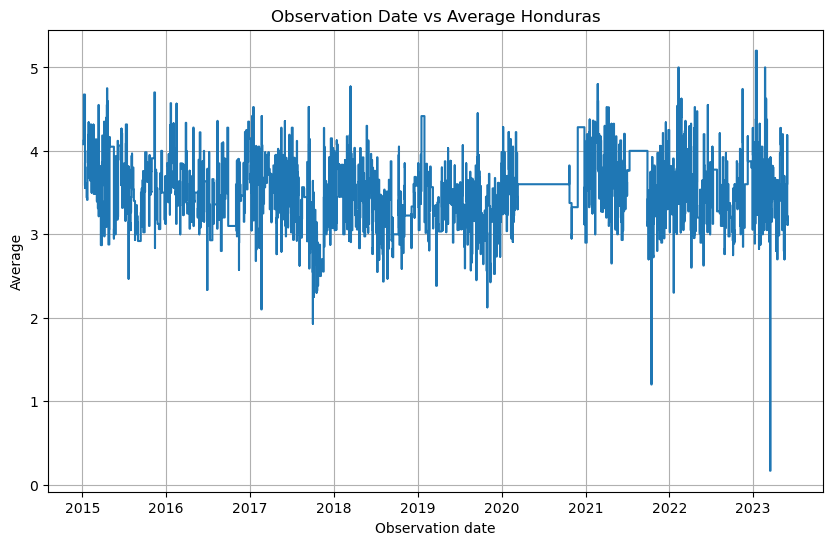

In [50]:
series_data = grouped_data['Average.']
series_data = series_data.reset_index()  # Convert DataFrame to Series
series_data = series_data.set_index('Observation date')  # Set 'Observation date' as index

# Plotting the series with gaps
plt.figure(figsize=(10, 6))
plt.step(series_data.index, series_data['Average.'], where='post')
plt.xlabel('Observation date')
plt.ylabel('Average')
plt.title('Observation Date vs Average Honduras')
plt.grid(True)
plt.show()

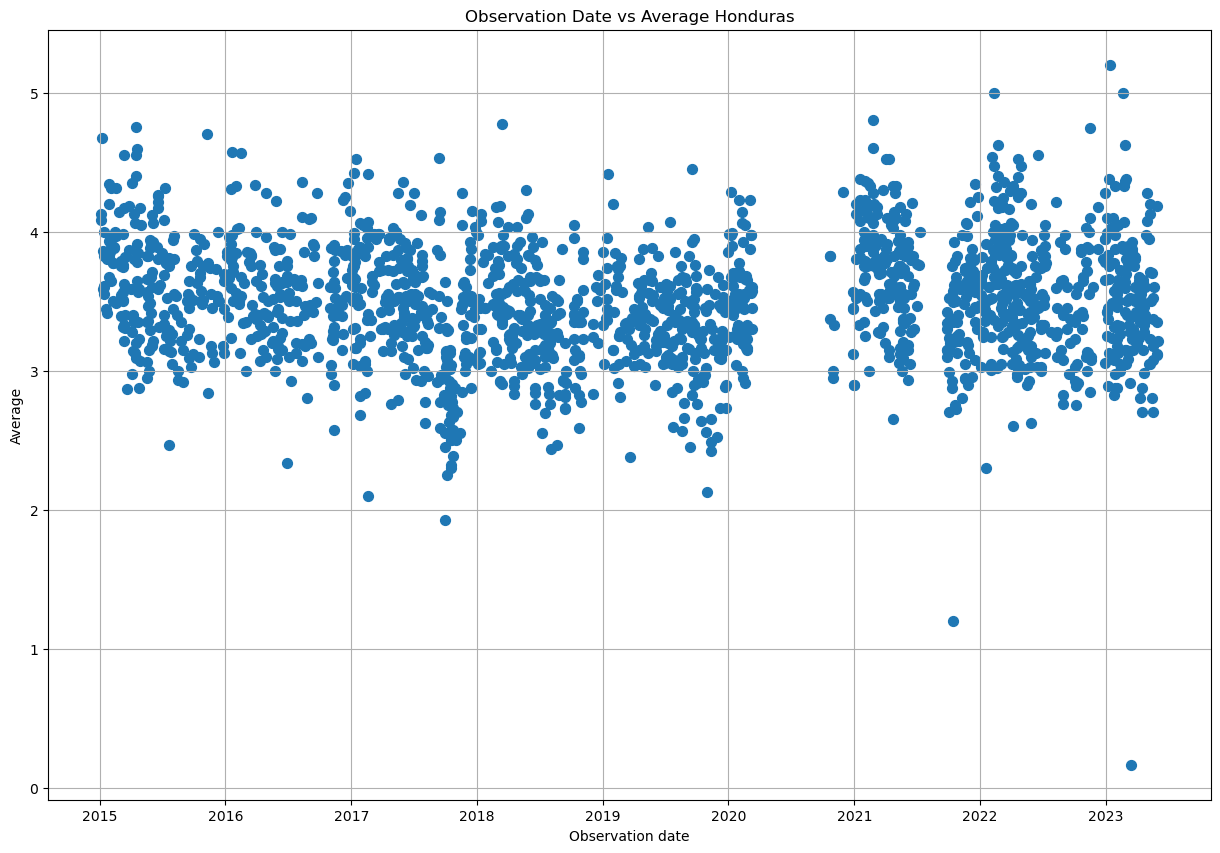

In [51]:
# Assuming your DataFrame is named 'grouped_data' with the fixed datetime index
series_data = grouped_data['Average.']
series_data = series_data.reset_index()  # Convert DataFrame to Series
series_data['Observation date'] = pd.to_datetime(series_data['Observation date'])  # Convert to datetime type

# Plotting scatter points of average values versus observation dates
plt.figure(figsize=(15, 10))
plt.scatter(series_data['Observation date'], series_data['Average.'], s=50, marker='o')
plt.xlabel('Observation date')
plt.ylabel('Average')
plt.title('Observation Date vs Average Honduras')
plt.grid(True)
plt.show()

/tmp/ipykernel_50212/1463827566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = subset_gdf_2015.groupby(['Observation date', 'Site Name']).mean()


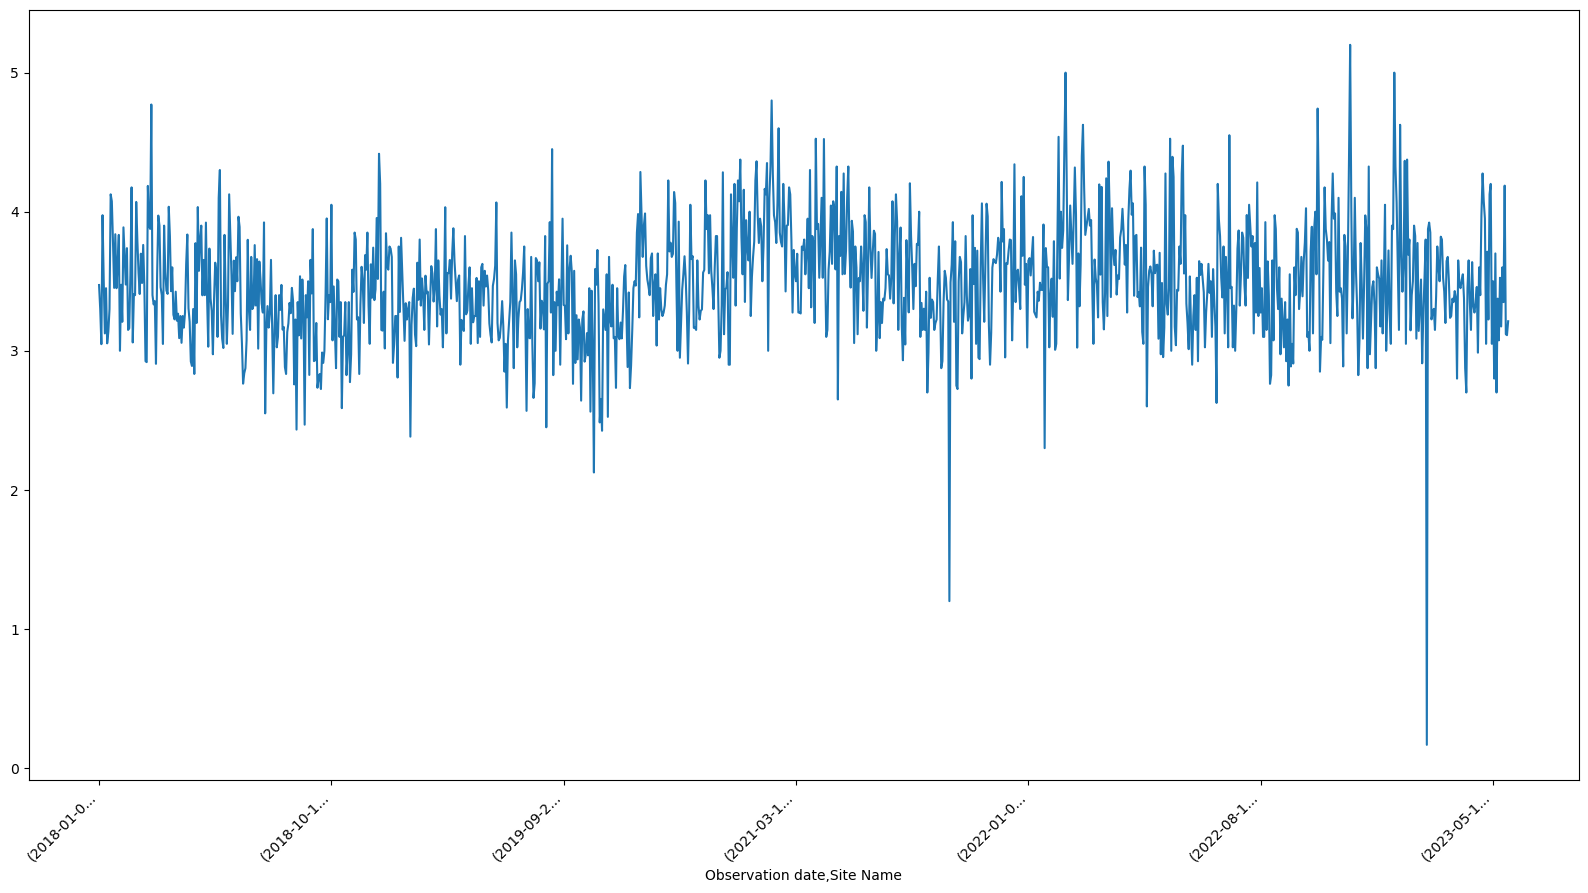

In [147]:
grouped_df = subset_gdf_2015.groupby(['Observation date', 'Site Name']).mean()
grouped_df['Average.'].plot(figsize = (20,10))

ax = plt.gca()

# Define a function to modify the x-labels
def format_x_labels(label):
    # Modify the label as needed
    modified_label = label[:10] + '...' if len(label) > 10 else label
    return modified_label

# Apply the function to the x-tick labels
ax.set_xticklabels([format_x_labels(label.get_text()) for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.show()

In [31]:
# get the bounds of the raster
raster_bounds = src.bounds
# create a shapely polygon object from the bounding box
polygon = Polygon([(raster_bounds.left, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.top), 
                    (raster_bounds.left, raster_bounds.top)])
# check if the point is within the bounds of the raster
#is_within_bounds = pnt_.within(polygon)

In [32]:
unique_locations = subset_gdf_2015.groupby(['Longitude', 'Latitude']).first().reset_index()


In [33]:
unique_locations = unique_locations.set_crs('EPSG:4326')
unique_locations = unique_locations.to_crs(src.crs)

In [34]:
unique_locations

,Longitude,Latitude,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
0,-87.005280,16.066389,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,a072c3c3-2226-4e51-8fe2-a7279dbbb7b1,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,E3,D4,3.5,Boulder corals,None,NaN,"CustomChartDataItem|||2|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||11,Cust...",POINT (499435.271 1776278.987)
1,-87.000771,16.082907,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,de42b591-7cc7-4a3e-8168-8bf6bc0166a9,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B2,C5,3.5,Boulder corals,None,NaN,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||18,Cust...",POINT (499917.544 1778106.122)
2,-86.998611,16.086945,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,1c153964-77ae-460c-afde-04117a60d99c,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,C4,D6,5.0,Boulder corals,None,NaN,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||14,Cust...",POINT (500148.547 1778552.787)
3,-86.989166,16.094166,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,5b705d81-c2ae-4f28-962e-5ed66aa8a740,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D3,D6,4.5,Boulder corals,None,NaN,"CustomChartDataItem|||4|||5,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||16,Cust...",POINT (501158.602 1779351.570)
4,-86.989166,16.112499,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,4448c890-8137-41d6-b0ae-36e6b7ebffc6,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D3,E5,4.0,Boulder corals,None,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||1,Custo...",POINT (501158.496 1781379.484)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-86.873886,16.086388,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,c0430847-d995-44f1-a75b-edf7f68477d8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,C3,C5,4.0,Boulder corals,None,NaN,"CustomChartDataItem|||2|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||16,Cust...",POINT (513487.332 1778495.286)
67,-86.873886,16.107777,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,d5e004ab-243e-4fc1-8560-0f357ca025a1,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,E3,E4,3.5,Boulder corals,None,NaN,"CustomChartDataItem|||2|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||12,Cust...",POINT (513485.888 1780861.245)
68,-86.870689,16.094990,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,9e85977b-f32c-4eb9-aeb5-28e876a3fb3a,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,E3,E5,4.0,Boulder corals,None,NaN,"CustomChartDataItem|||2|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||21,Cust...",POINT (513828.642 1779447.013)
69,-86.870003,16.094166,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,f18e6269-c0fe-4948-a08f-beb3348df419,2001-12-31,NaN,S

In [35]:

def get_raster_values(raster_file, pnt):
    values = {}
    with rasterio.open(raster_file) as src:
        # transform the given longitude and latitude to the coordinate system of the raster
        dst_crs = src.crs
        bounds = src.bounds
        polygon = Polygon([(bounds.left, bounds.bottom), 
                            (bounds.right, bounds.bottom), 
                            (bounds.right, bounds.top), 
                            (bounds.left, bounds.top)])
        is_within_bounds = pnt.within(polygon)
        # check if the transformed coordinates are within the bounds of the raster file
        if not is_within_bounds:
            return None
        # read the pixel values from each band
        print("Operation succesful")
        lon, lat = pnt.x, pnt.y
        for band_num in range(1, src.count+1):
            row, col = src.index(lon, lat)
            band_data = src.read(band_num, window=((row, row+1), (col, col+1)))
            values[f'band_{band_num}'] = band_data[0][0]
    return values

In [37]:
import os
import glob

# specify the directory path
dir_path = path

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [38]:
unique_locations.head()

,Longitude,Latitude,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
0,-87.005280,16.066389,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,a072c3c3-2226-4e51-8fe2-a7279dbbb7b1,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,E3,D4,3.5,Boulder corals,None,NaN,"CustomChartDataItem|||2|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||11,Cust...",POINT (499435.271 1776278.987)
1,-87.000771,16.082907,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,de42b591-7cc7-4a3e-8168-8bf6bc0166a9,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B2,C5,3.5,Boulder corals,None,NaN,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||18,Cust...",POINT (499917.544 1778106.122)
2,-86.998611,16.086945,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,1c153964-77ae-460c-afde-04117a60d99c,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,C4,D6,5.0,Boulder corals,None,NaN,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||14,Cust...",POINT (500148.547 1778552.787)
3,-86.989166,16.094166,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,5b705d81-c2ae-4f28-962e-5ed66aa8a740,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D3,D6,4.5,Boulder corals,None,NaN,"CustomChartDataItem|||4|||5,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||16,Cust...",POINT (501158.602 1779351.570)
4,-86.989166,16.112499,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,4448c890-8137-41d6-b0ae-36e6b7ebffc6,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D3,E5,4.0,Boulder corals,None,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||1,Custo...",POINT (501158.496 1781379.484)


In [39]:
fname_dict = {}
for file in dir_list:
    for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
        spectral_sig = get_raster_values(file, pnt)
        if spectral_sig is None:
            continue
        if id in fname_dict.keys():
            fname_dict[id].append({file:spectral_sig})
        else:
            fname_dict[id] = [{file:[spectral_sig]}]


Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful


In [40]:
for keys in fname_dict.keys():
    print(keys)

Raggedy Cay, Utila, Honduras
West End, Utila, Honduras
The Maze, Utila, Honduras
Spotted Bay, Utila, Honduras
Diamond Cay, Utila, Honduras
Stingray Point, Utila, Honduras
Cabanas, Utila, Honduras
Fishbowl, Utila, Honduras
Pinnacle, Utila, Honduras
Duppy Waters, Utila, Honduras
Meso American, Utila, Honduras
Big Rock, Utila, Honduras
Jack Neal Beach/Point, Utila, Honduras
Little Bight, Utila, Honduras
Neptunes, Utila, Honduras
Green House, Utila, Honduras
Isla Utila / Buoy 21, Utila, Honduras
Labyrinth, Utila, Honduras
Pretty Bush, Utila, Honduras
Black Coral Wall, Utila, Honduras
Big Coral Wall, Utila, Honduras
Laguna Beach, Utila, Honduras
Silver Garden, Utila, Honduras
Blue Bayou, Utila, Honduras
Coral View West, Utila, Honduras
Coral View House Reef, Utila, Honduras
Coral View, Utila, Honduras
Misc. Seamount, Utila, Honduras
Oliver's Wreck, Utila, Honduras
Jack's Bight, Utila, Honduras
Iron Bound, Utila, Honduras
Sturges Bank, Utila, Honduras
Texas/Twin Peaks, Utila, Honduras
Lighth

In [58]:
(fname_dict["The Maze, Utila, Honduras"])

[{'/media/ziad/Expansion/Honduras_Extracted/S2A_MSIL2A_20221122T161601_N0400_R140_T16PEC_20221122T220303.zip.tiff': [{'band_1': 1328,
    'band_2': 1236,
    'band_3': 1141,
    'band_4': 1079,
    'band_5': 1058,
    'band_6': 1063,
    'band_7': 1060,
    'band_8': 1043,
    'band_9': 1045,
    'band_10': 965,
    'band_11': 1035,
    'band_12': 1020}]},
 {'/media/ziad/Expansion/Honduras_Extracted/S2A_MSIL2A_20200516T160911_N0214_R140_T16PDC_20200516T203626.zip.tiff': {'band_1': 1282,
   'band_2': 1156,
   'band_3': 1044,
   'band_4': 980,
   'band_5': 987,
   'band_6': 920,
   'band_7': 887,
   'band_8': 1011,
   'band_9': 865,
   'band_10': 993,
   'band_11': 857,
   'band_12': 716}},
 {'/media/ziad/Expansion/Honduras_Extracted/S2A_MSIL2A_20200923T161011_N0214_R140_T16PDC_20200923T203905.zip.tiff': {'band_1': 405,
   'band_2': 321,
   'band_3': 273,
   'band_4': 214,
   'band_5': 207,
   'band_6': 159,
   'band_7': 168,
   'band_8': 141,
   'band_9': 178,
   'band_10': 103,
   'ban

In [55]:
def dict_to_dataframe(data_dict):
    """
    Takes in a key and a dictionary and returns a pandas dataframe with the
    keys as the index row, headers as the column headers, and values as values.
    """
    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data_dict, orient='index').T
    
    # Set the index name to the given key
    
    # Reset the column headers
    df.columns = range(len(df.columns))
    
    return df

In [63]:
full_df = pd.DataFrame()
for keys in fname_dict.keys():
    stacked_df = pd.DataFrame()
    for i in fname_dict[keys]:
        try:
            df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0][0])
        except:
            df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0])
        df['fname'] = list(i.keys())[0]
        stacked_df = pd.concat([stacked_df, df])
    stacked_df['Site Name'] = keys
    full_df = pd.concat([full_df, stacked_df])

In [65]:
full_df

,0,1,2,3,4,5,6,7,8,9,10,11,fname,Site Name
0,1882,1526,1406,1412,1504,1570,1651,1313,1669,2574,1530,1709,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1364,1482,1494,918,984,907,870,854,894,908,848,719,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1326,1250,1198,970,1028,970,978,948,972,953,937,809,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1080,1284,1384,649,617,577,565,492,578,412,541,489,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,909,860,774,514,571,553,541,467,533,378,495,433,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,259,287,135,36,42,36,47,26,35,0,32,34,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras"
0,1298,1299,1175,1089,1100,1084,1097,1074,1101,1088,1087,1084,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras"
0,1306,1334,1134,1016,1012,1010,1021,1013,1014,998,1013,1015,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras"
0,1195,1172,1085,1019,1006,1008,1008,1005,1012,972,1012,1009,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras"


In [66]:
import seaborn as sns

In [67]:
from ShallowLearn.band_mapping import band_mapping

In [69]:
list(full_df.columns[12:])

['fname', 'Site Name']

In [71]:
band_mapping.keys()

dict_keys(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12'])

In [73]:
full_df.columns = list(band_mapping.keys())[:-1] + list(full_df.columns[12:])

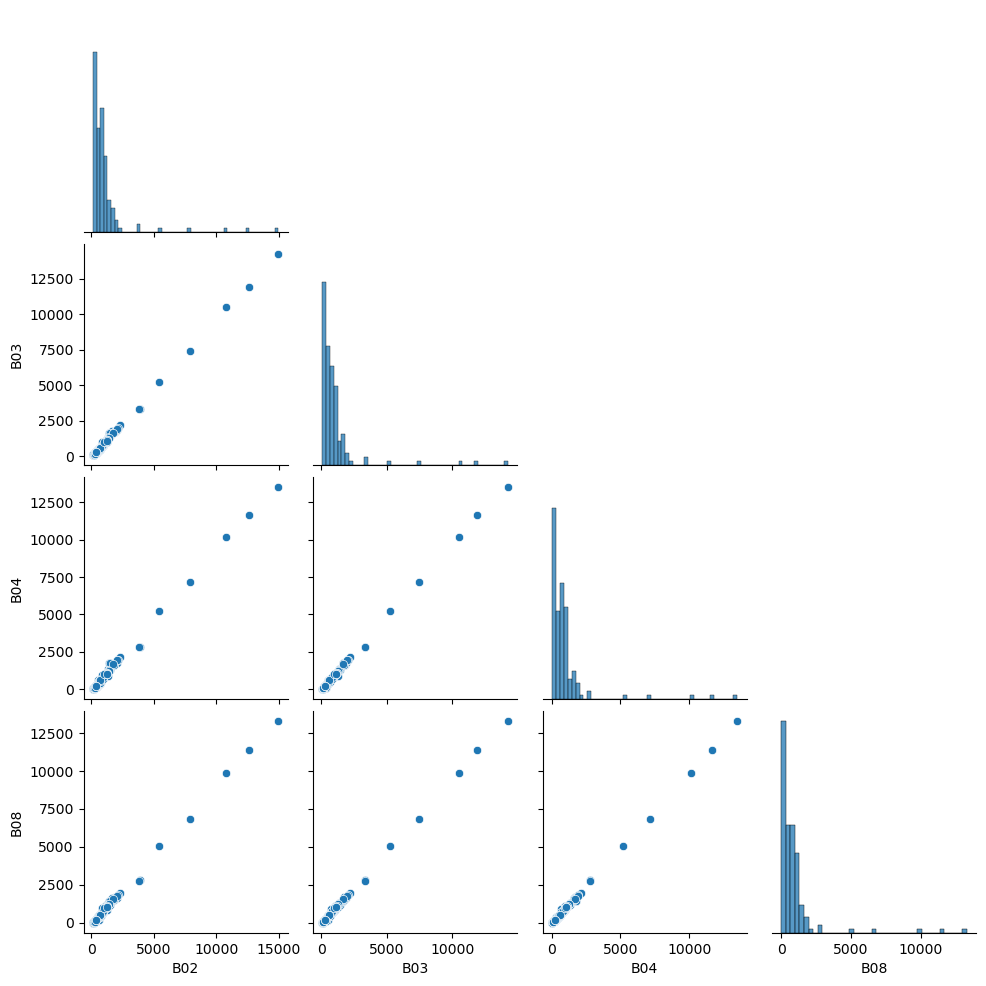

In [74]:
sns.pairplot(full_df[full_df['Site Name'] == 'The Maze, Utila, Honduras'][['B02','B03','B04','B08']], corner=True)

In [75]:
for name in stacked_df.fname:
    print(name)
    break

/media/ziad/Expansion/Honduras_Extracted/S2A_MSIL2A_20200516T160911_N0214_R140_T16PDC_20200516T203626.zip.tiff


In [76]:
full_df

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,fname,Site Name
0,1882,1526,1406,1412,1504,1570,1651,1313,1669,2574,1530,1709,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1364,1482,1494,918,984,907,870,854,894,908,848,719,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1326,1250,1198,970,1028,970,978,948,972,953,937,809,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,1080,1284,1384,649,617,577,565,492,578,412,541,489,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
0,909,860,774,514,571,553,541,467,533,378,495,433,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,259,287,135,36,42,36,47,26,35,0,32,34,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras"
0,1298,1299,1175,1089,1100,1084,1097,1074,1101,1088,1087,1084,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras"
0,1306,1334,1134,1016,1012,1010,1021,1013,1014,998,1013,1015,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras"
0,1195,1172,1085,1019,1006,1008,1008,1005,1012,972,1012,1009,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras"


In [77]:
full_df['date_col'] = full_df['fname'].str.extract(r'_(\d{8})', expand=False)

In [78]:
full_df

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,fname,Site Name,date_col
0,1882,1526,1406,1412,1504,1570,1651,1313,1669,2574,1530,1709,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",20221122
0,1364,1482,1494,918,984,907,870,854,894,908,848,719,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",20200516
0,1326,1250,1198,970,1028,970,978,948,972,953,937,809,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",20200516
0,1080,1284,1384,649,617,577,565,492,578,412,541,489,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",20200923
0,909,860,774,514,571,553,541,467,533,378,495,433,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",20200923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,259,287,135,36,42,36,47,26,35,0,32,34,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras",20220121
0,1298,1299,1175,1089,1100,1084,1097,1074,1101,1088,1087,1084,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras",20230121
0,1306,1334,1134,1016,1012,1010,1021,1013,1014,998,1013,1015,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras",20230116
0,1195,1172,1085,1019,1006,1008,1008,1005,1012,972,1012,1009,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras",20221222


In [79]:
full_df['date_col'] = pd.to_datetime(full_df['date_col'], format='%Y%m%d')

In [80]:
full_df

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,fname,Site Name,date_col
0,1882,1526,1406,1412,1504,1570,1651,1313,1669,2574,1530,1709,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",2022-11-22
0,1364,1482,1494,918,984,907,870,854,894,908,848,719,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",2020-05-16
0,1326,1250,1198,970,1028,970,978,948,972,953,937,809,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",2020-05-16
0,1080,1284,1384,649,617,577,565,492,578,412,541,489,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",2020-09-23
0,909,860,774,514,571,553,541,467,533,378,495,433,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Raggedy Cay, Utila, Honduras",2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,259,287,135,36,42,36,47,26,35,0,32,34,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras",2022-01-21
0,1298,1299,1175,1089,1100,1084,1097,1074,1101,1088,1087,1084,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras",2023-01-21
0,1306,1334,1134,1016,1012,1010,1021,1013,1014,998,1013,1015,/media/ziad/Expansion/Honduras_Extracted/S2B_M...,"Paradiso, Utila, Honduras",2023-01-16
0,1195,1172,1085,1019,1006,1008,1008,1005,1012,972,1012,1009,/media/ziad/Expansion/Honduras_Extracted/S2A_M...,"Paradiso, Utila, Honduras",2022-12-22


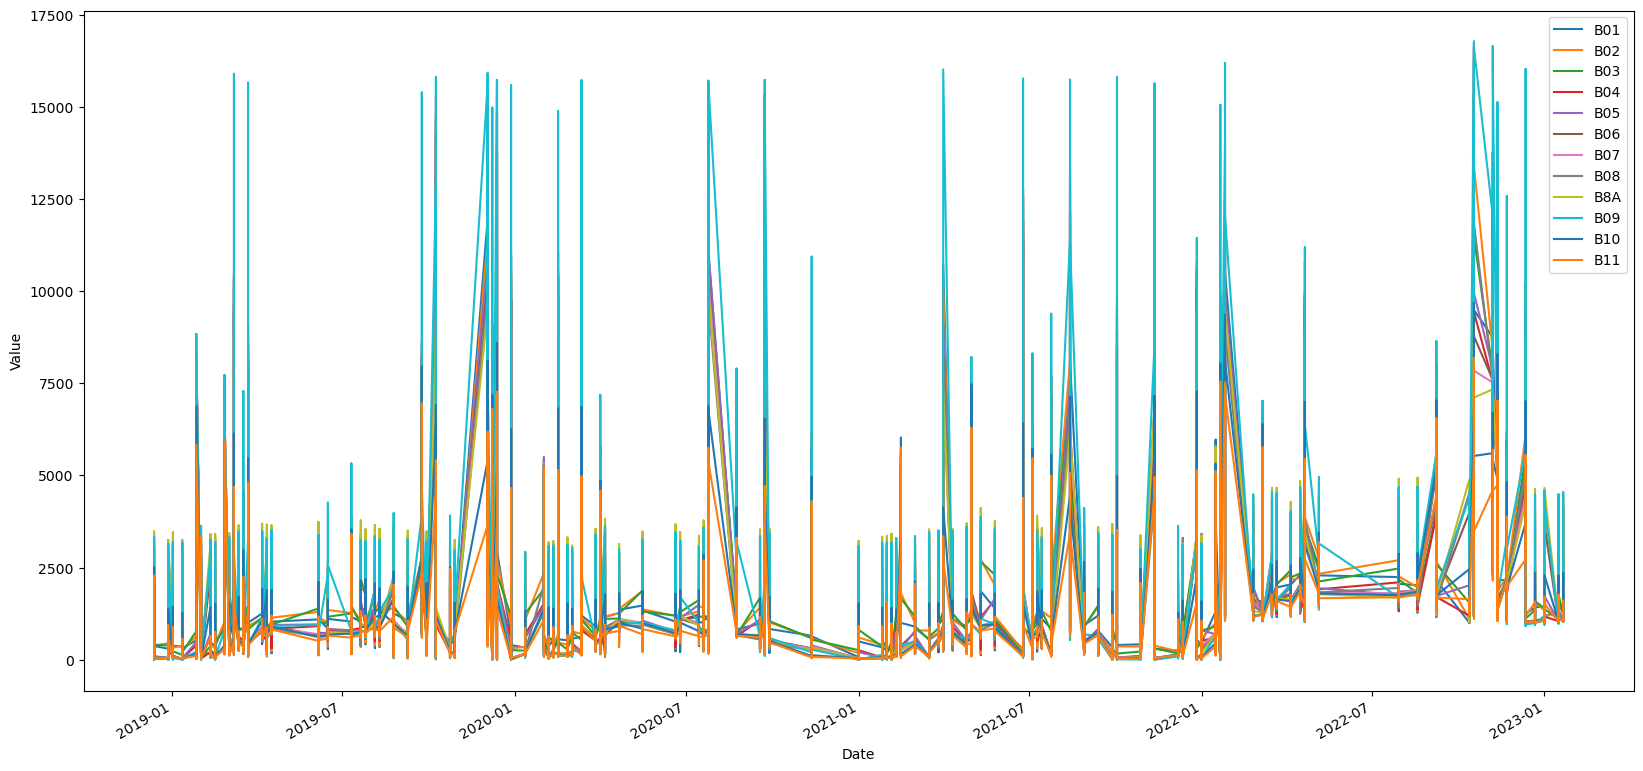

In [81]:
import matplotlib.pyplot as plt

full_df_copy = full_df.copy()
full_df.set_index('date_col', inplace=True)
full_df.plot(kind = 'line', figsize=(20,10))
# Set the x label to 'Date'
plt.xlabel('Date')

# Set the y label to 'Value'
plt.ylabel('Value')

# Show the plot
plt.show()

In [83]:

# # Set the index of the dataframe to the date column

# stacked_df.set_index('date_col', inplace=True)

# # Create a line plot of the dataframe
# stacked_df.plot(kind='line')

# # Set the x label to 'Date'
# plt.xlabel('Date')

# # Set the y label to 'Value'
# plt.ylabel('Value')

# # Show the plot
# plt.show()

In [84]:
full_df_copy = full_df.copy()
band_data = full_df_copy.select_dtypes(include=['uint16'])

In [85]:
horse_shoe = subset_gdf_2015[subset_gdf_2015['Site Name'] == "The Maze, Utila, Honduras"]

In [86]:
# horse_shoe[]

In [87]:
horse_shoe[['Observation date', 'Average.']]

,Observation date,Average.
82237,2021-02-24 00:00:00,3.5
82238,2021-02-24 00:00:00,4.5
82239,2021-02-24 00:00:00,5.5
82240,2021-02-24 00:00:00,3.5
82241,2021-02-24 00:00:00,5.5
...,...,...
96943,2023-01-10 17:00:00,4.0
96944,2023-01-10 17:00:00,1.5
96945,2023-01-10 17:00:00,5.0
96946,2023-01-10 17:00:00,3.0


In [88]:
horse_shoe['Observation date'].unique()

array(['2021-02-24T00:00:00.000000000', '2021-01-31T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2019-12-26T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-05-09T00:00:00.000000000', '2023-01-10T18:00:00.000000000',
       '2023-01-10T17:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
full_df_copy.reset_index(inplace=True)

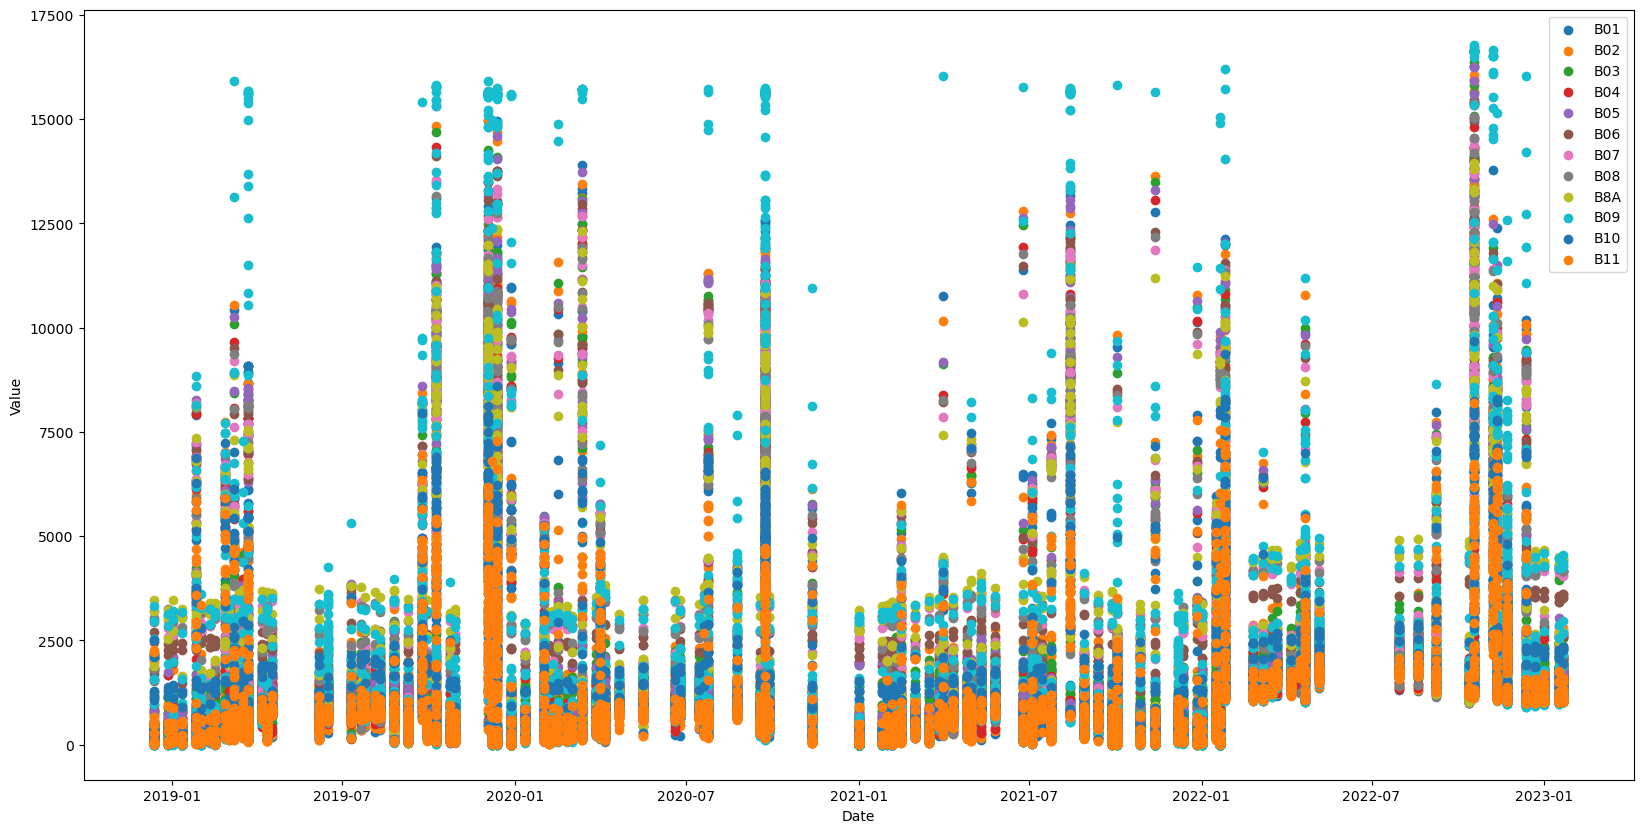

In [127]:
# Create a scatter plot of the dataframe
fig, ax = plt.subplots(figsize=(20,10))
for col in band_data.columns:
    ax.scatter(full_df_copy['date_col'], band_data[col], label = col)

# Set the x label to 'Date'
ax.set_xlabel('Date')

# Set the y label to 'Value'
ax.set_ylabel('Value')

# Show the plot
plt.legend()
plt.show()

In [95]:
import joblib
loaded_pipeline = joblib.load('/home/ziad/Documents/Github/ShallowLearn/Models/pipeline.pkl')

In [96]:
X_train = full_df_copy.select_dtypes(include=['uint16'])

In [97]:
pred = loaded_pipeline.predict(X_train)

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 12 features, but StandardScaler is expecting 13 features as input.

In [53]:
import seaborn as sns

In [ ]:
sns.plot()

In [57]:
full_df_copy['pred'] = pred

In [59]:
full_df_copy.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,     'fname', 'Site Name',
        'date_col',      'pred'],
      dtype='object')

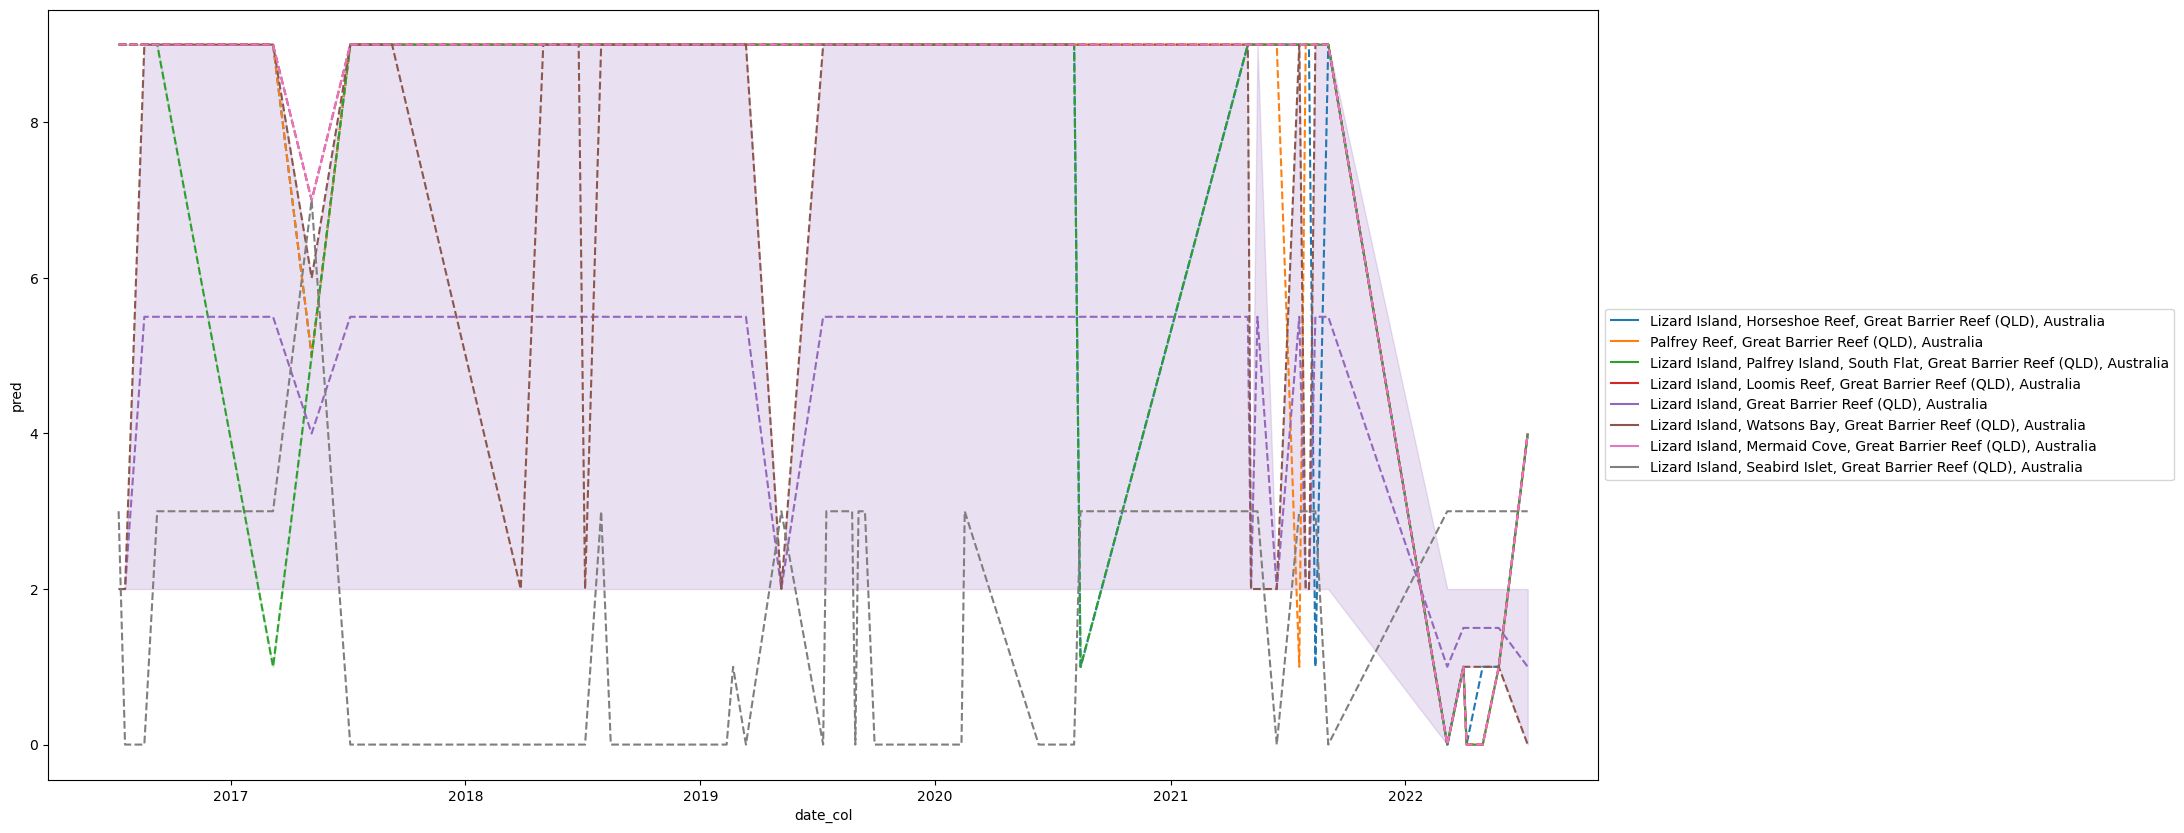

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
scatterplot = sns.lineplot(x='date_col', y='pred', hue ='Site Name', data=full_df_copy, ax = ax, legend='full', linestyle='dashed', dashes=(1, 1))
legend = scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [99]:
my_area_gdf = subset_gdf_2015[['Observation date', 'Coral Type','Average.','Site Name']]

In [100]:
liz_reefs = pd.DataFrame(full_df_copy['Site Name'].unique())
liz_reefs.columns = ['Site Name']

In [101]:
merged_df = pd.merge(my_area_gdf, liz_reefs, on='Site Name', how='inner')

In [111]:
merged_df

,Observation date,Coral Type,Average.,Site Name
0,2021-05-16 00:00:00,Boulder corals,2.5,"Airport Caves, Utila, Honduras"
1,2021-05-16 00:00:00,Boulder corals,4.0,"Airport Caves, Utila, Honduras"
2,2021-05-16 00:00:00,Boulder corals,4.5,"Airport Caves, Utila, Honduras"
3,2021-05-16 00:00:00,Boulder corals,3.5,"Airport Caves, Utila, Honduras"
4,2021-05-16 00:00:00,Boulder corals,4.5,"Airport Caves, Utila, Honduras"
...,...,...,...,...
43678,2022-12-29 17:00:00,Boulder corals,4.0,"Isla Utila / Buoy 21, Utila, Honduras"
43679,2022-12-29 17:00:00,Boulder corals,4.5,"Isla Utila / Buoy 21, Utila, Honduras"
43680,2022-12-29 17:00:00,Boulder corals,4.5,"Isla Utila / Buoy 21, Utila, Honduras"
43681,2022-12-29 17:00:00,Boulder corals,3.0,"Isla Utila / Buoy 21, Utila, Honduras"


/tmp/ipykernel_50212/3598152177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(['Site Name', 'Coral Type']).mean().plot(kind='hist', figsize=(20,10))


<Axes: ylabel='Frequency'>

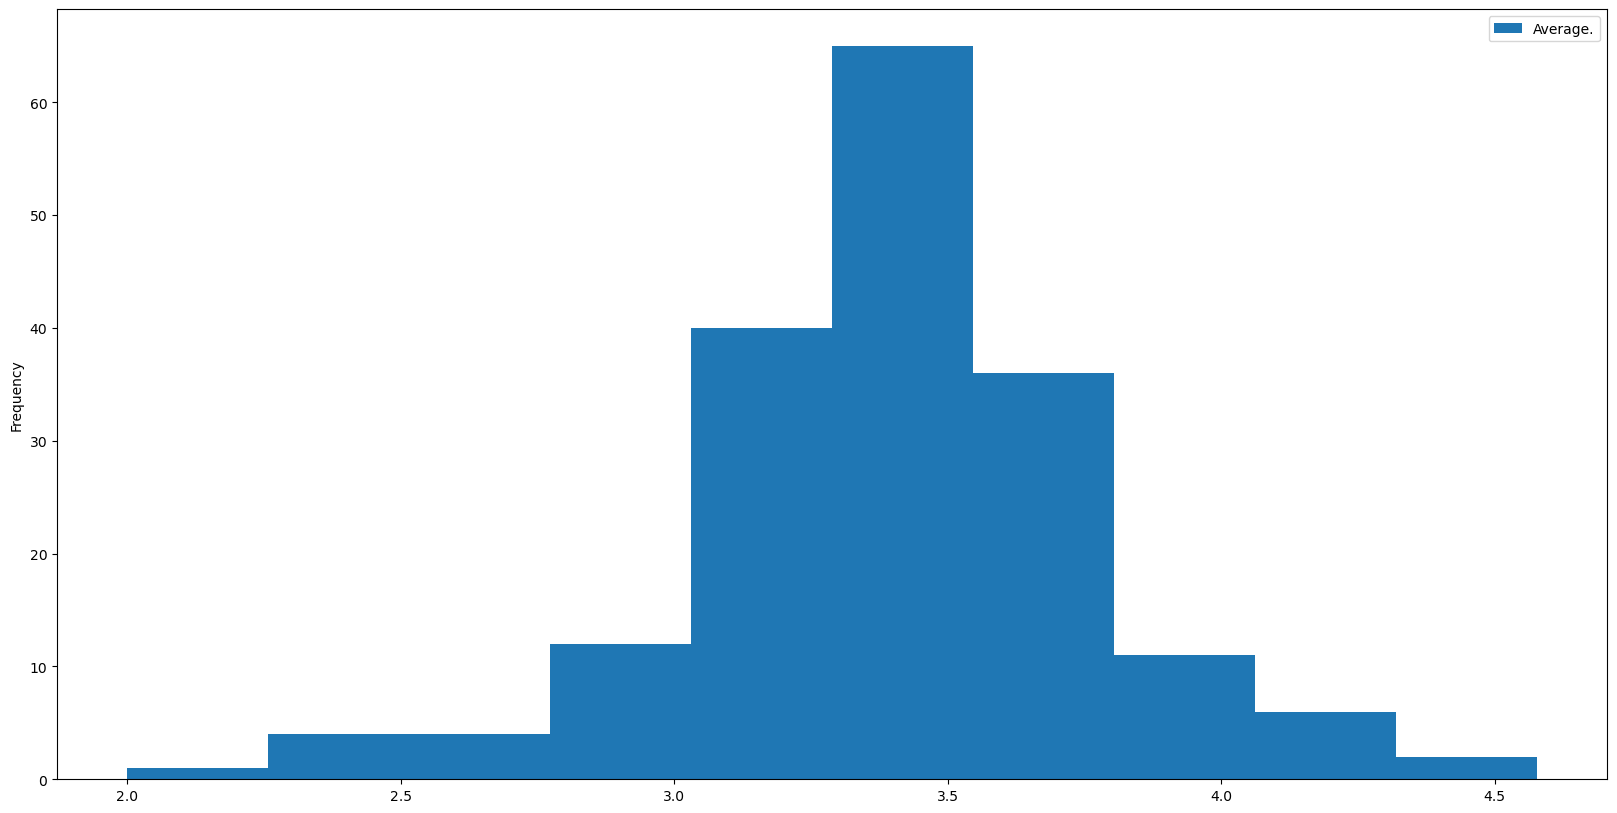

In [109]:
merged_df.groupby(['Site Name', 'Coral Type']).mean().plot(kind='hist', figsize=(20,10))

/tmp/ipykernel_50212/1480367970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(['Observation date']).mean().plot(kind ='line', figsize=(20,10))


<Axes: xlabel='Observation date'>

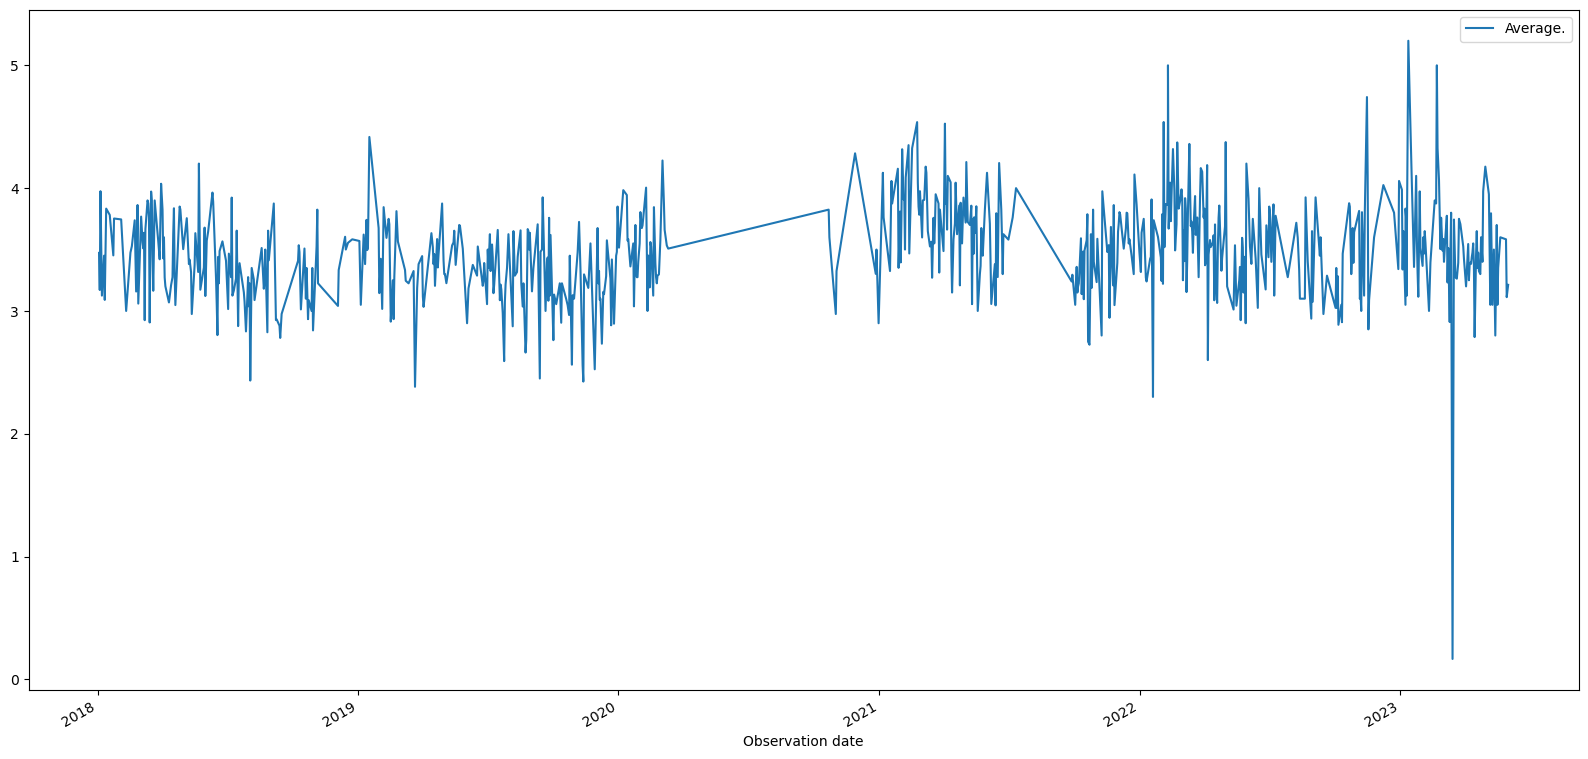

In [115]:
merged_df.groupby(['Observation date']).mean().plot(kind ='line', figsize=(20,10))

/tmp/ipykernel_50212/2712514518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(['Site Name']).mean().plot(kind = 'bar', figsize = (20, 10))


<Axes: xlabel='Site Name'>

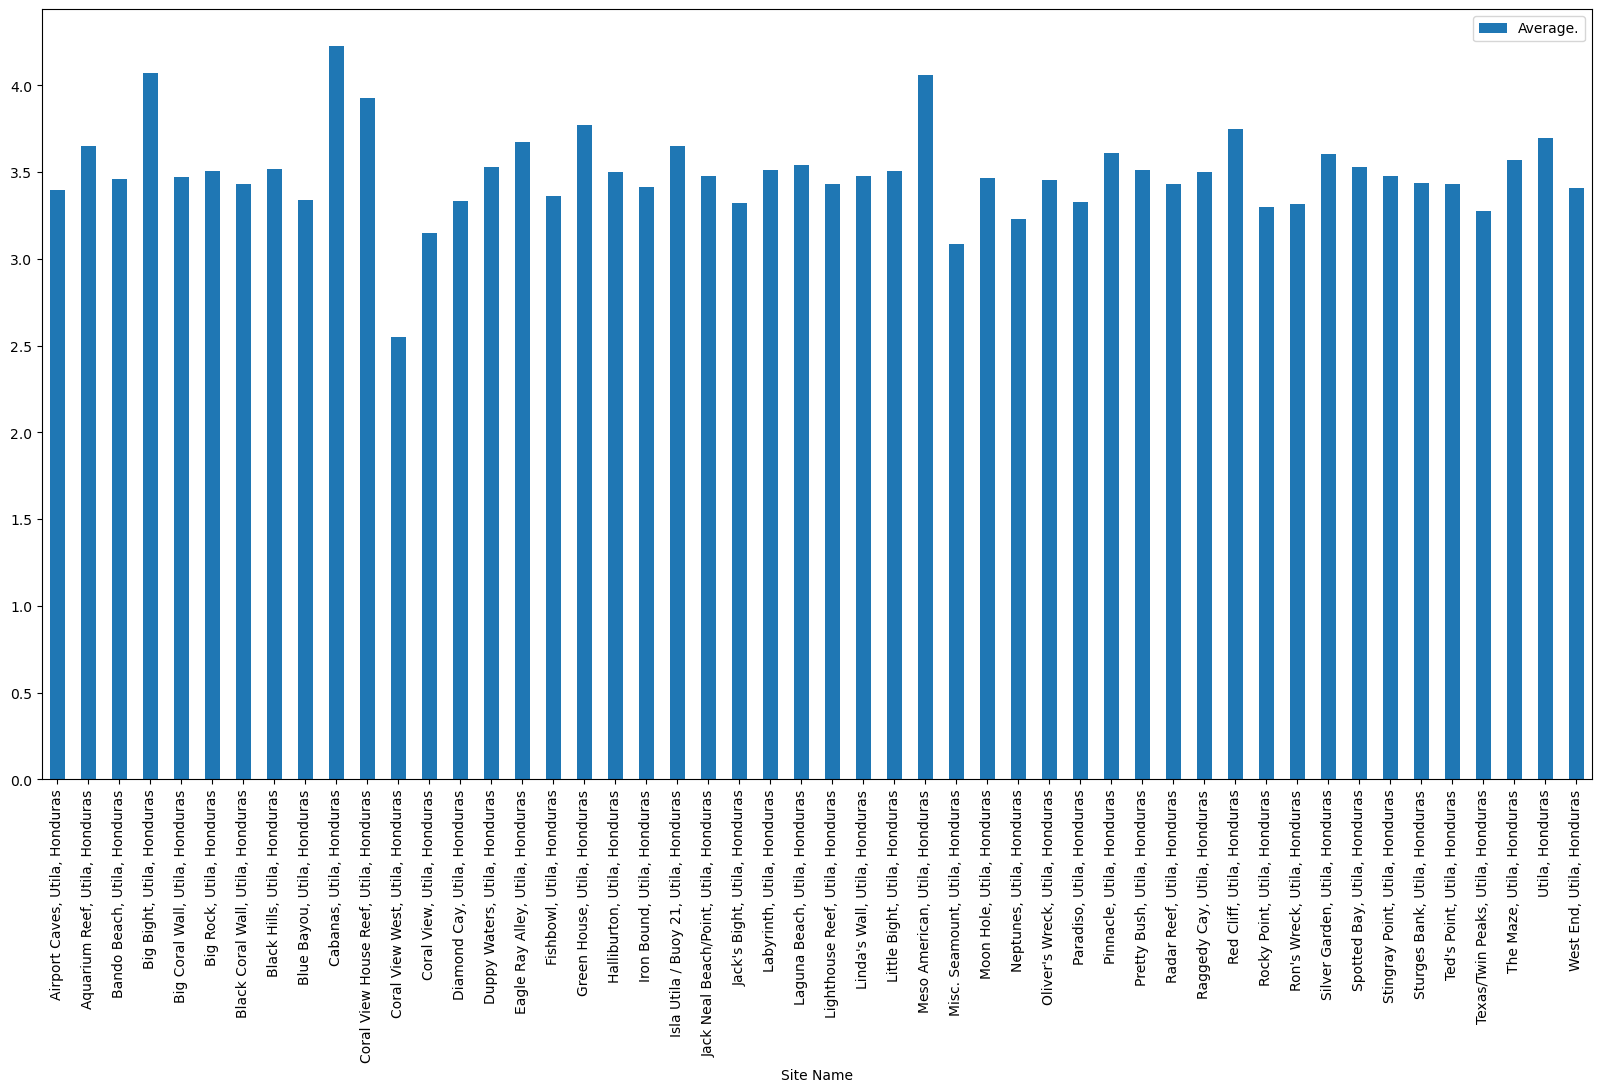

In [118]:
merged_df.groupby(['Site Name']).mean().plot(kind = 'bar', figsize = (20, 10))

In [125]:
merged_df[merged_df['Site Name'] == 'Coral View House Reef, Utila, Honduras']

,Observation date,Coral Type,Average.,Site Name
14215,2021-06-05,Boulder corals,6.0,"Coral View House Reef, Utila, Honduras"
14216,2021-06-05,Boulder corals,5.5,"Coral View House Reef, Utila, Honduras"
14217,2021-06-05,Boulder corals,5.0,"Coral View House Reef, Utila, Honduras"
14218,2021-06-05,Boulder corals,5.0,"Coral View House Reef, Utila, Honduras"
14219,2021-06-05,Boulder corals,4.0,"Coral View House Reef, Utila, Honduras"
14220,2021-06-05,Boulder corals,4.0,"Coral View House Reef, Utila, Honduras"
14221,2021-06-05,Boulder corals,2.0,"Coral View House Reef, Utila, Honduras"
14222,2021-06-05,Boulder corals,3.5,"Coral View House Reef, Utila, Honduras"
14223,2021-06-05,Boulder corals,3.5,"Coral View House Reef, Utila, Honduras"
14224,2021-06-05,Boulder corals,3.5,"Coral View House Reef, Utila, Honduras"


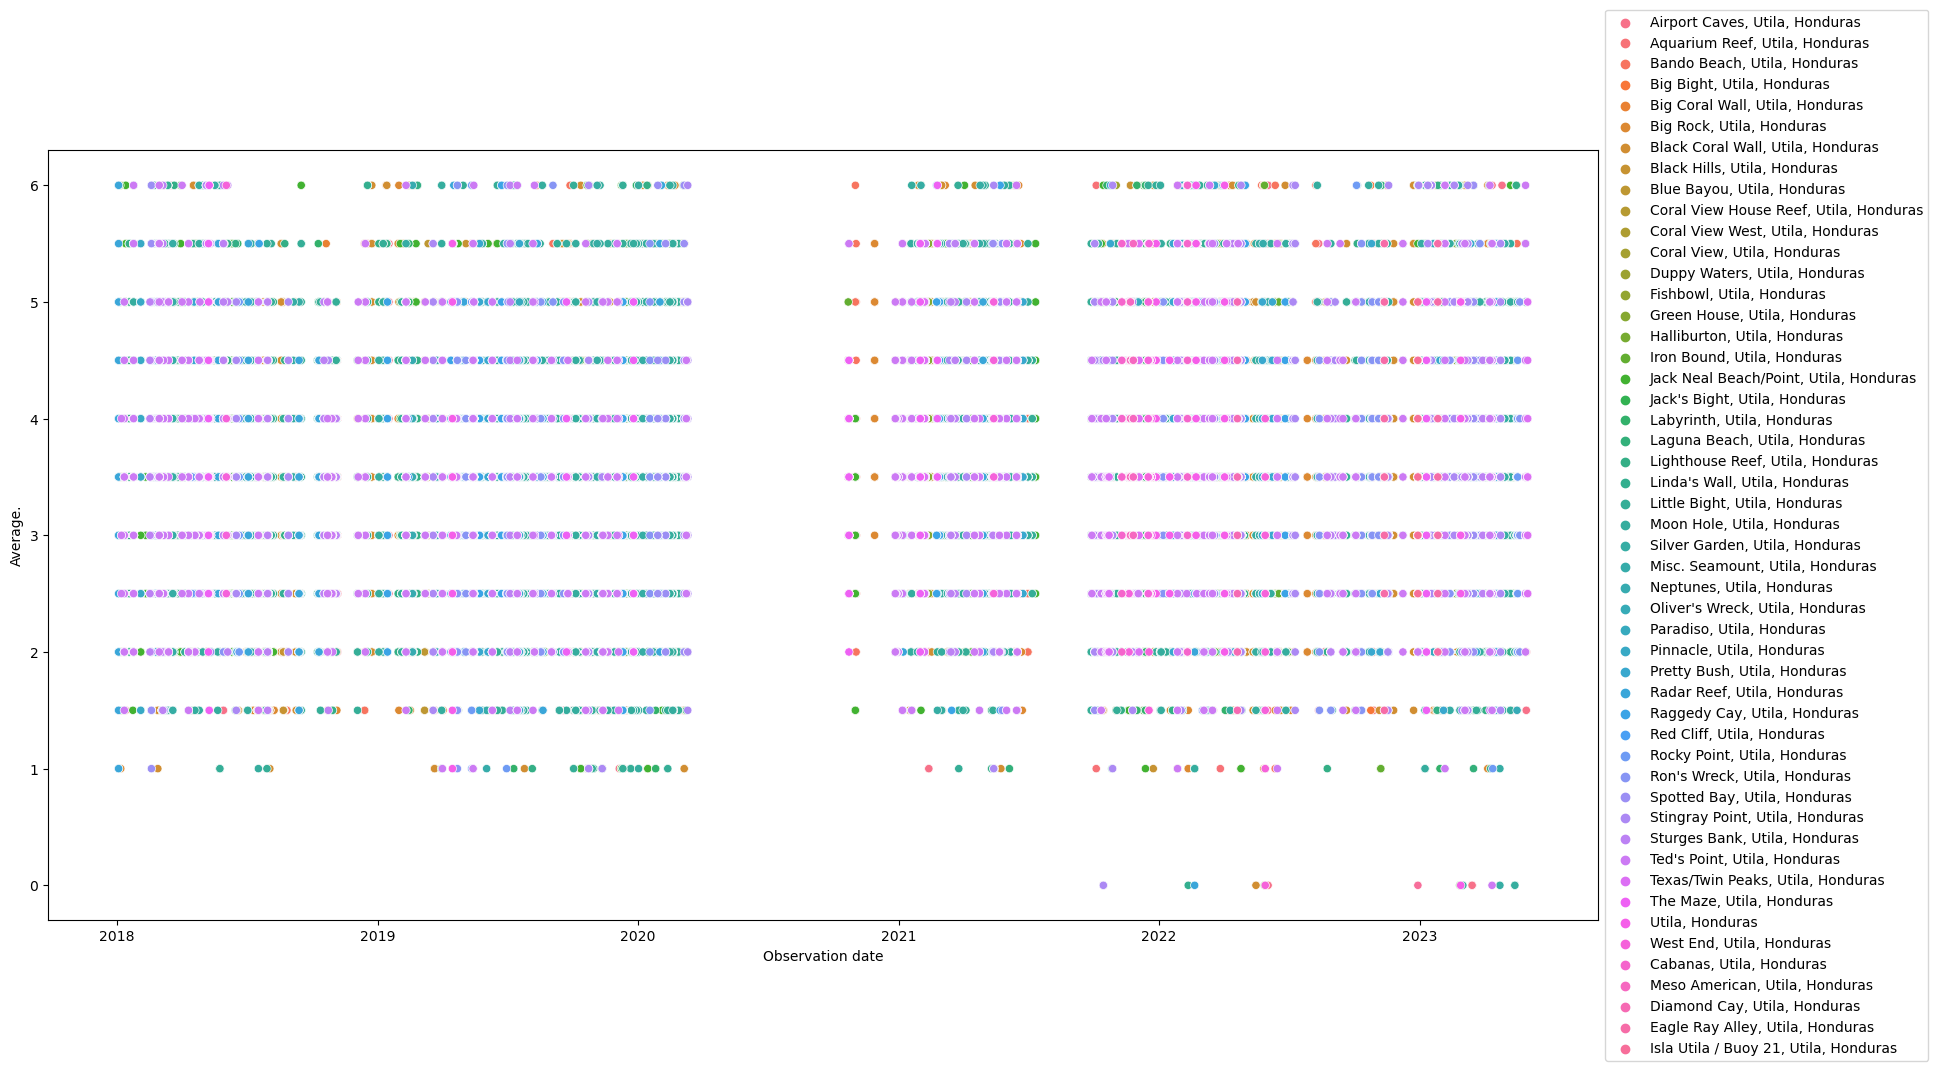

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
scatterplot = sns.scatterplot(x='Observation date', y='Average.', hue ='Site Name', data=merged_df, ax = ax, legend='full')
legend = scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [68]:
spectral_sig = get_raster_values(file, pnt)

In [43]:
output_test = gpd.GeoDataFrame(index=[0], crs=src.crs, geometry=[spectral_sig]) 

In [44]:
output_test.to_file("../Data/Lizard_test.shp")

In [45]:
fname_dict

{'Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia': [{'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff': [{'band_1': 1670,
     'band_2': 1602,
     'band_3': 1199,
     'band_4': 361,
     'band_5': 276,
     'band_6': 231,
     'band_7': 222,
     'band_8': 164,
     'band_9': 52,
     'band_10': 5,
     'band_11': 91,
     'band_12': 67,
     'band_13': 184}]},
  {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160721T004002no_transform.tiff': {'band_1': 1534,
    'band_2': 1453,
    'band_3': 1092,
    'band_4': 312,
    'band_5': 245,
    'band_6': 200,
    'band_7': 188,
    'band_8': 152,
    'band_9': 46,
    'band_10': 7,
    'band_11': 75,
    'band_12': 61,
    'band_13': 161}},
  {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160820T003712no_transform.tiff': {'band_1': 1675,
    'band_2': 1669,
    'band_3': 1209,
    'band_4': 403,
    'band_5': 327,
    'band_6': 299,
    'band_7': 287,

In [46]:
for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
    print(pnt, id)

POINT (315304.4627402294 8322411.446601819) Lizard Island, Watsons Bay, Great Barrier Reef (QLD), Australia
POINT (329947.3186976809 8295101.081160216) Boulder Reef, D-7, Great Barrier Reef (QLD), Australia
POINT (330088.736314313 8296365.311968818) Egret Reef, 205, Great Barrier Reef (QLD), Australia
POINT (329803.1512277748 8335705.646823901) Egret Reef, 209, Great Barrier Reef (QLD), Australia
POINT (330249.4857698097 8294997.408347715) Boulder Reef, S-16, Great Barrier Reef (QLD), Australia
POINT (330280.6490671112 8295445.994569834) Boulder Reef, S-12, Great Barrier Reef (QLD), Australia
POINT (330537.7927788411 8293431.378971329) Boulder Reef, D-1, Great Barrier Reef (QLD), Australia
POINT (330559.9670208911 8296879.862259328) Boulder Reef, D-6, Great Barrier Reef (QLD), Australia
POINT (331525.6451337981 8294066.213836609) Boulder Reef, S-2, Great Barrier Reef (QLD), Australia
POINT (331558.7848704159 8296486.708629119) Egret Reef, 204, Great Barrier Reef (QLD), Australia
POINT 

In [47]:
unique_locations.dtypes

Longitude                                                     float64
Latitude                                                      float64
Project ID                                                     object
Project Activity ID                                            object
Activity ID                                                    object
Start date                                                     object
End date                                                      float64
Description                                                    object
Status                                                         object
Attribution                                                    object
Verification status                                            object
Centroid Latitude                                             float64
Centroid Longitude                                            float64
Site Name                                                      object
Site External Id    

In [48]:
unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")

/tmp/ipykernel_36825/3108358576.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")


ValueError: Axis limits cannot be NaN or Inf

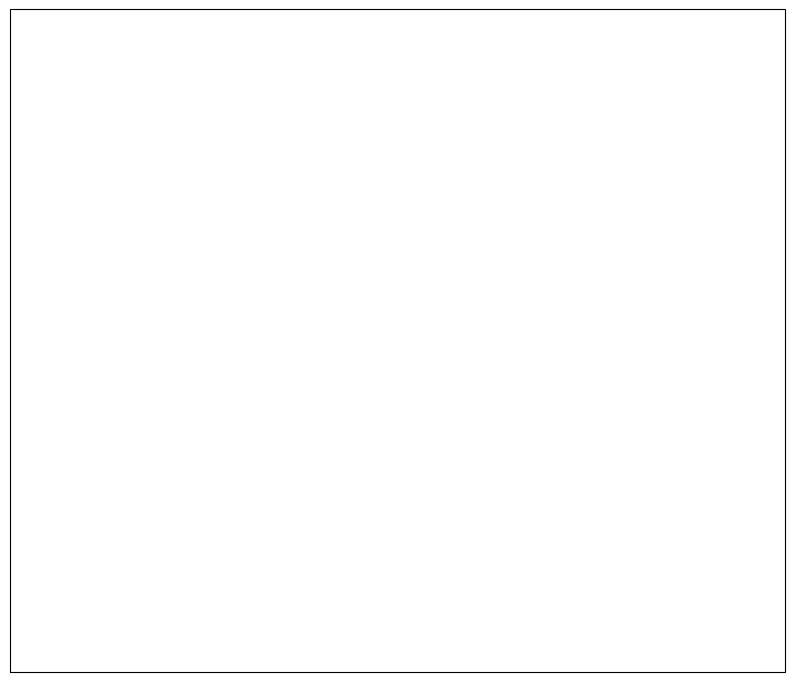

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Set up the map projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Mercator())

xmin, ymin, xmax, ymax = unique_locations.total_bounds
ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

# Add the bathymetric data as a background
ax.stock_img()

# Plot the GeoDataFrame on top of the bathymetry
ax.plot(gdf.geometry.x, gdf.geometry.y, 'o', markersize=5, color='red', transform=ccrs.PlateCarree())

# Add map features like coastlines and borders
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

# Show the plot
plt.show()

In [ ]:
-14.745567,145.511548

In [ ]:
y, x= -14.7385,145.5110

In [ ]:
# create a point object with coordinates (x, y)
point = Point(x, y)

In [ ]:
print(point)

POINT (145.511 -14.7385)


In [ ]:
pnt_ in src.bounds

False

In [ ]:
transform_geom('EPSG:4326', dst_crs, point)

{'type': 'Point', 'coordinates': (339712.68381670944, 8370066.7770678485)}

In [ ]:
dst_crs

CRS.from_epsg(32755)

In [ ]:
lon, lat

(339712.68381670944, 8370066.7770678485)

In [ ]:
pnt_ = Point(339729.4,8369227.1)

In [ ]:
pnt_.x

339729.4

In [ ]:
get_raster_values(tiff_path, pnt_)

{'band_1': 1934,
 'band_2': 1663,
 'band_3': 1462,
 'band_4': 1258,
 'band_5': 1315,
 'band_6': 1751,
 'band_7': 2004,
 'band_8': 1918,
 'band_9': 635,
 'band_10': 398,
 'band_11': 1442,
 'band_12': 955,
 'band_13': 2128}

In [ ]:

get_raster_values(tiff_path, x, y)

{'band_1': 2072,
 'band_2': 1850,
 'band_3': 1756,
 'band_4': 1708,
 'band_5': 1915,
 'band_6': 2471,
 'band_7': 2794,
 'band_8': 2672,
 'band_9': 755,
 'band_10': 403,
 'band_11': 2601,
 'band_12': 1541,
 'band_13': 3064}